In [1]:
import matplotlib as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 


%matplotlib inline

![Robot surface](https://www.lextronic.fr/imageslib/4D/0J7589.320.gif)

In [2]:
X_train = pd.read_csv('train_denoised.csv')

In [3]:
X_train.shape

(488448, 13)

In [4]:
X_train.tail()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
488443,3815_123,3815,123,-0.96683,0.20760,0.021964,-0.14715,-0.000943,-0.187672,0.565955,0.669942,3.703232,-9.463958
488444,3815_124,3815,124,-0.96668,0.20832,0.022090,-0.14712,0.008831,-0.189725,0.571592,0.534148,3.713131,-9.123287
488445,3815_125,3815,125,-0.96653,0.20902,0.022185,-0.14713,0.005668,-0.186319,0.573711,0.501348,3.646051,-8.748730
488446,3815_126,3815,126,-0.96637,0.20974,0.022284,-0.14710,-0.009409,-0.178358,0.571015,0.556620,3.496950,-8.589038
488447,3815_127,3815,127,-0.96621,0.21048,0.022436,-0.14709,-0.027071,-0.169430,0.564832,0.641492,3.305044,-8.772941


In [5]:
X_train.count()

row_id                   488448
series_id                488448
measurement_number       488448
orientation_X            488448
orientation_Y            488448
orientation_Z            488448
orientation_W            488448
angular_velocity_X       488448
angular_velocity_Y       488448
angular_velocity_Z       488448
linear_acceleration_X    488448
linear_acceleration_Y    488448
linear_acceleration_Z    488448
dtype: int64

In [6]:
X_train.shape

(488448, 13)

In [7]:
# Read y_train(target)
y_train = pd.read_csv("y_train.csv", skipinitialspace = True, squeeze = True)
y_train.head()

,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles


In [8]:
y_train.count()

series_id    3810
group_id     3810
surface      3810
dtype: int64

In [9]:
y_train.shape

(3810, 3)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


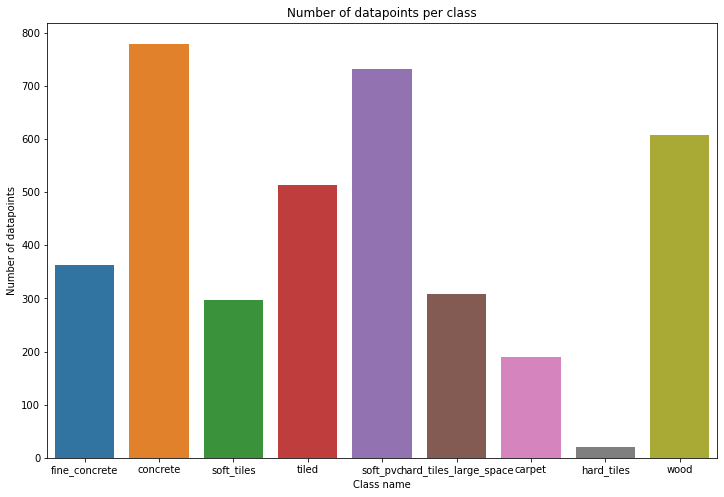

In [10]:
# Plot per class data-points
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12, 8))
sns.countplot(y_train["surface"])
plt.title("Number of datapoints per class")
plt.ylabel("Number of datapoints")
plt.xlabel("Class name")
plt.show()

In [11]:
# Encode class label
y_train["surface_label"] = y_train["surface"].map({'fine_concrete':0, 'concrete':1, 'soft_tiles':2, 'tiled':3, 'soft_pvc':4,
       'hard_tiles_large_space':5, 'carpet':6, 'hard_tiles':7, 'wood':8})

In [12]:
# To merge train_data with corresponding class label
Data = pd.merge(X_train, y_train[["surface_label", "series_id"]], on = "series_id") 
Data.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,surface_label
0,0_0,0,0,-0.025773,-0.98864,-0.14801,0.003350,-0.047434,0.052242,-0.051110,-0.349592,3.447810,-8.266600,0
1,0_1,0,1,-0.025683,-0.98862,-0.14816,0.003439,-0.016013,0.070963,-0.044423,0.149975,3.324911,-9.670939,0
2,0_2,0,2,-0.025617,-0.98861,-0.14826,0.003571,0.035311,0.064296,-0.037642,0.984894,3.136577,-10.237986,0
3,0_3,0,3,-0.025566,-0.98862,-0.14817,0.003609,0.066246,0.036622,-0.029866,1.715259,2.935127,-9.802881,0
4,0_4,0,4,-0.025548,-0.98866,-0.14792,0.003477,0.056346,0.004131,-0.020680,1.959945,2.754846,-8.981595,0


In [13]:
Data=Data.drop(columns=['row_id', 'series_id','measurement_number'])

In [14]:
Data.to_csv('Detect surface.csv',index=False)

In [40]:
print('\nNumber of duplicated records: {}'.format(Data.duplicated().sum()))


Number of duplicated records: 0


In [ ]:
X_train.count()
y_train.count()

In [ ]:
print(X_train.shape) 
print(y_train.shape)

In [ ]:
Data.shape

In [ ]:
# Split the data into train and test

X=Data[['orientation_X','orientation_Y','orientation_Z','orientation_W','angular_velocity_X','angular_velocity_Y','angular_velocity_Z','linear_acceleration_X','linear_acceleration_Y','linear_acceleration_Z']]
y=Data['surface_label']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 4)

In [ ]:
# Plot per class data-points
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12, 8))
sns.countplot(y)
plt.title("Number of datapoints per class")
plt.ylabel("Number of datapoints")
plt.xlabel("Class name")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)

In [ ]:
Data.shape

In [ ]:
from sklearn.svm import SVC 
svm = SVC(C=200)
svm.fit(X_train, y_train)

print('The accuracy on the training subset: {:.3f}'.format(svm.score(X_train, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(X_test, y_test)))

In [ ]:
print(svm.predict([[0.64135,0.75313,0.10835,0.098611,-0.195956,2.004110,-0.087878,5.993309,4.951328,0.346151]]))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

In [ ]:
print('Accuracy of KNN n-5, on the trainning set:{:.3f}'.format(knn.score(X_train,y_train)))
print('Accuracy of KNN n-5, on the testting set:{:.3f}'.format(knn.score(X_test,y_test)))

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
print('The accuracy on the training subset: {:.3f}'.format(clf.score(X_train, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(clf.score(X_test,y_test)))

In [ ]:
Data['surface_label']

In [ ]:
from sklearn.externals import joblib

In [ ]:
joblib.dump(svm,'Detect Surface')

In [ ]:
clf=joblib.load('Detect Surface')